In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#train = pd.read_csv('/Users/huiyisang/Desktop/archive/train.csv',sep=";")
#test = pd.read_csv('/Users/huiyisang/Desktop/archive/test.csv', sep=";")

train = pd.read_csv('https://raw.githubusercontent.com/qmdismnp/Schulich_DS_MBAN/refs/heads/main/train.csv?token=GHSAT0AAAAAACX2ZFBOUPYFUYCHGPBYXNASZXPEZFQ',sep=";")
test = pd.read_csv('https://raw.githubusercontent.com/qmdismnp/Schulich_DS_MBAN/refs/heads/main/test.csv?token=GHSAT0AAAAAACX2ZFBO2UU6M7CODNOTO6FIZXPEY5A', sep=";")

In [52]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [54]:
# Combine the datasets
df = pd.concat([train, test],ignore_index=True)

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Data Exploration

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [57]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [58]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


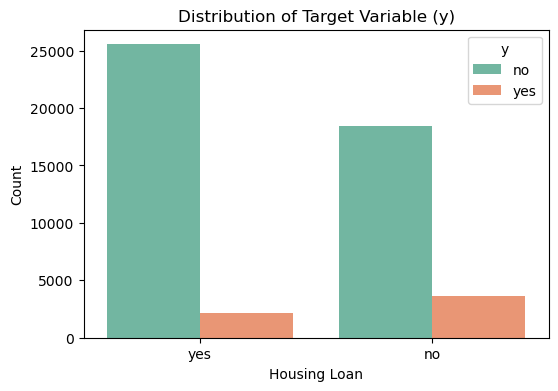

In [82]:
# Plot the distribution of the target variable 'deposit'
plt.figure(figsize=(6, 4))
sns.countplot(x='housing', hue='y', data=df, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

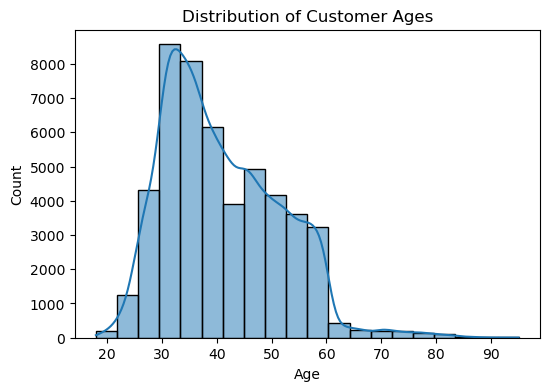

In [60]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

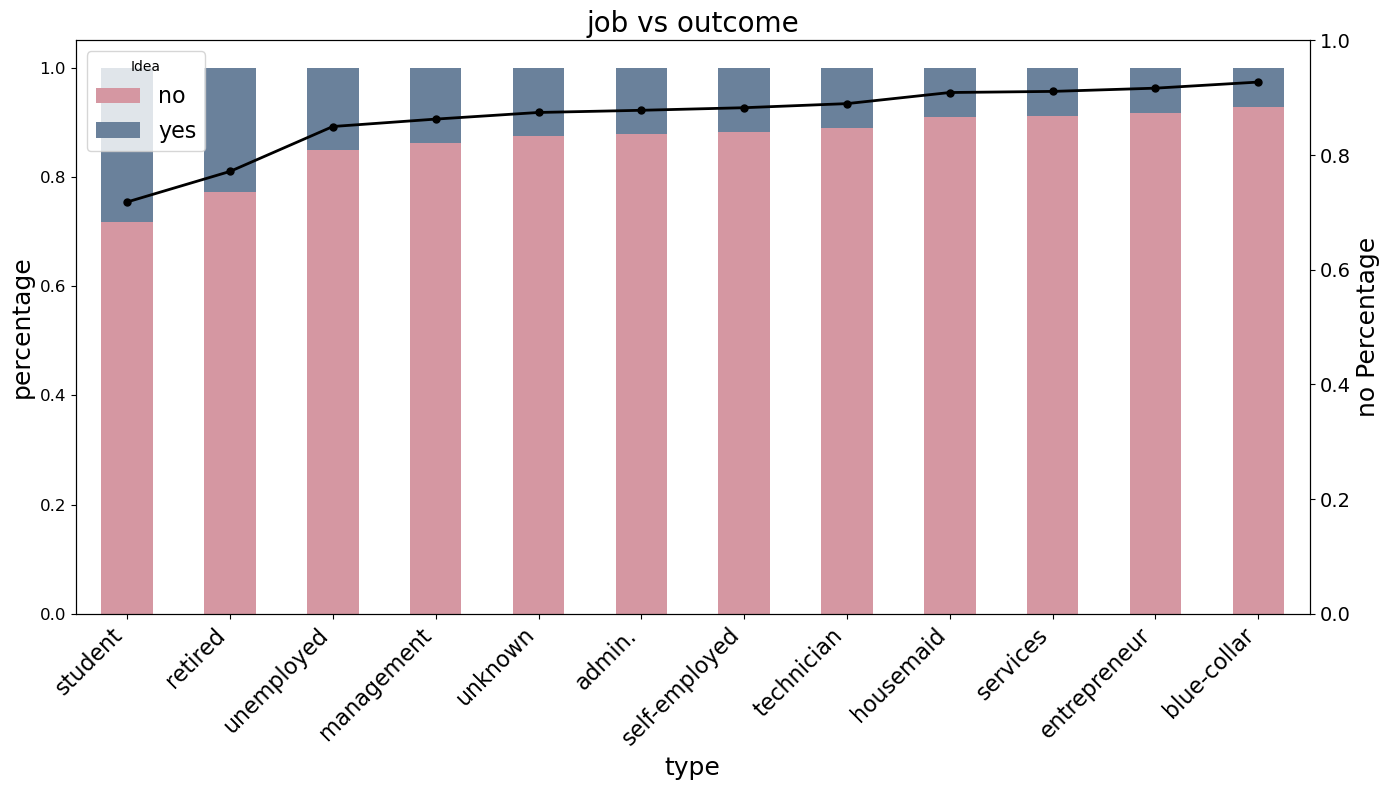

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Create a new column for Good idea and Bad idea
def plot_stacked_bar_chart(x, title, xlabel, ylabel):
    # Count the count of Good and Bad ideas in each category
    idea_counts = df.groupby([x, 'y']).size().unstack().fillna(0)
    
    # Calculate the total for each category
    total_counts = idea_counts.sum(axis=1)
    
    # Calculate the proportion of Good and Bad ideas in each category
    idea_percentage = idea_counts.div(total_counts, axis=0)
    
    # Sort in order of the proportion of Bad ideas
    idea_percentage = idea_percentage.sort_values(by='no')
    
    # Draw a stacked bar chart
    ax = idea_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#D597A2', '#6A819B'])  
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=12)
    plt.legend(title='Idea', fontsize=16)
    
    # Add a curve to describe the proportion of bad ideas
    bad_idea_percentage = idea_percentage['no'].values
    ax2 = ax.twinx()
    ax2.plot(range(len(bad_idea_percentage)), bad_idea_percentage, color='black', marker='o', linestyle='-', linewidth=2, markersize=5)
    ax2.set_ylim(0, 1)
    ax2.set_ylabel('no Percentage', fontsize=18)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Draw a stacked bar chart for F_PARTYLN_FINAL
plot_stacked_bar_chart('job', 'job vs outcome', 'type', 'percentage')


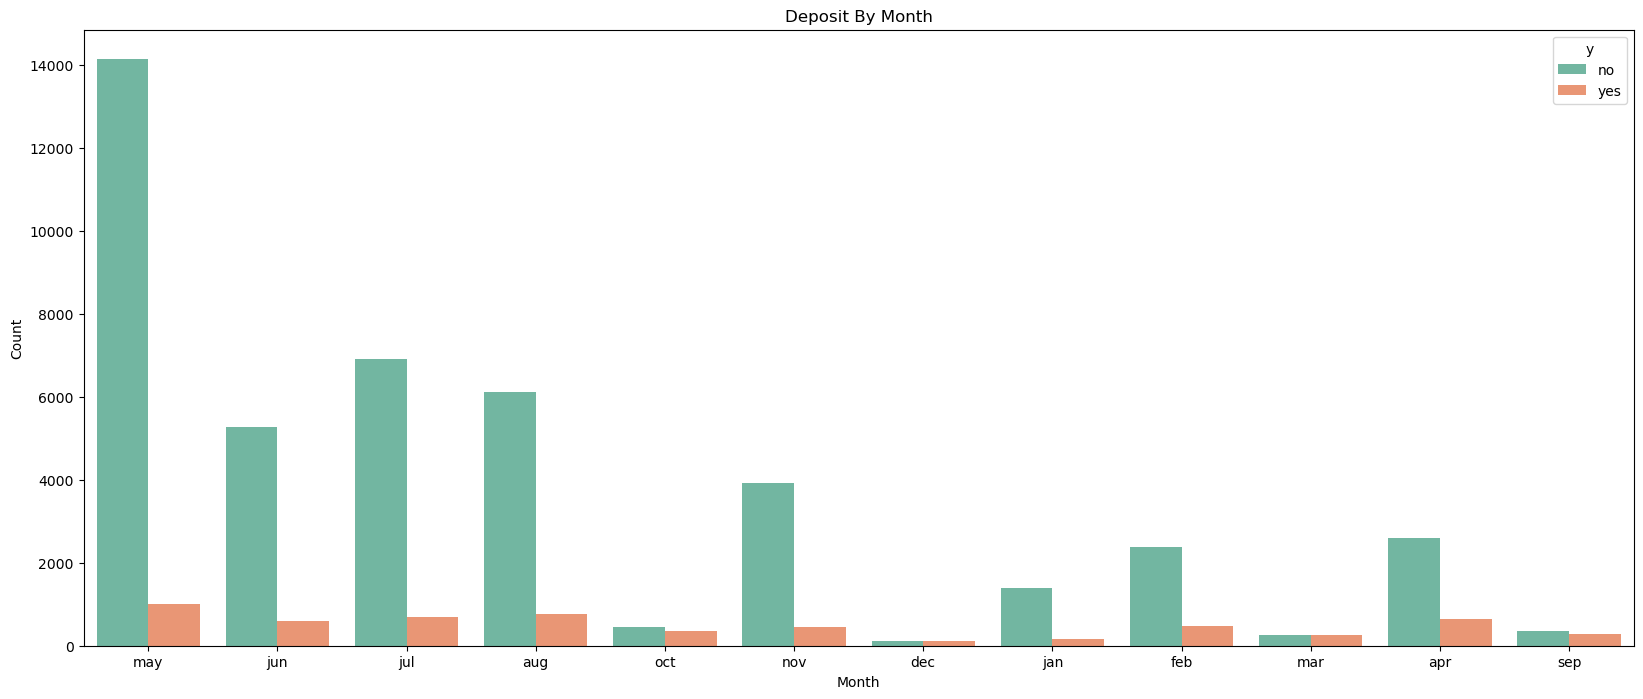

In [93]:
plt.figure(figsize=(20, 8))
sns.countplot(x='month', hue='y',data=df, palette='Set2')
plt.title('Deposit By Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

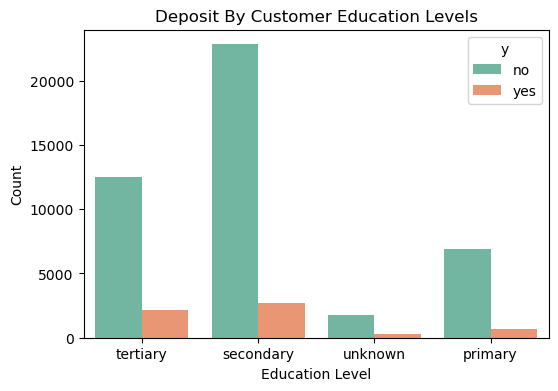

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', hue='y',data=df, palette='Set2')
plt.title('Deposit By Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

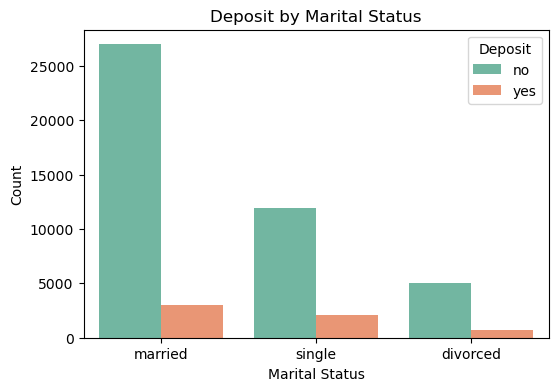

In [63]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=df, palette='Set2')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

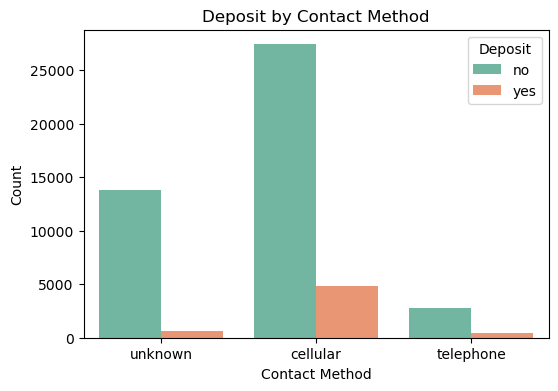

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contact', hue='y', data=df, palette='Set2')
plt.title('Deposit by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

In [65]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='y', ylabel='pdays'>

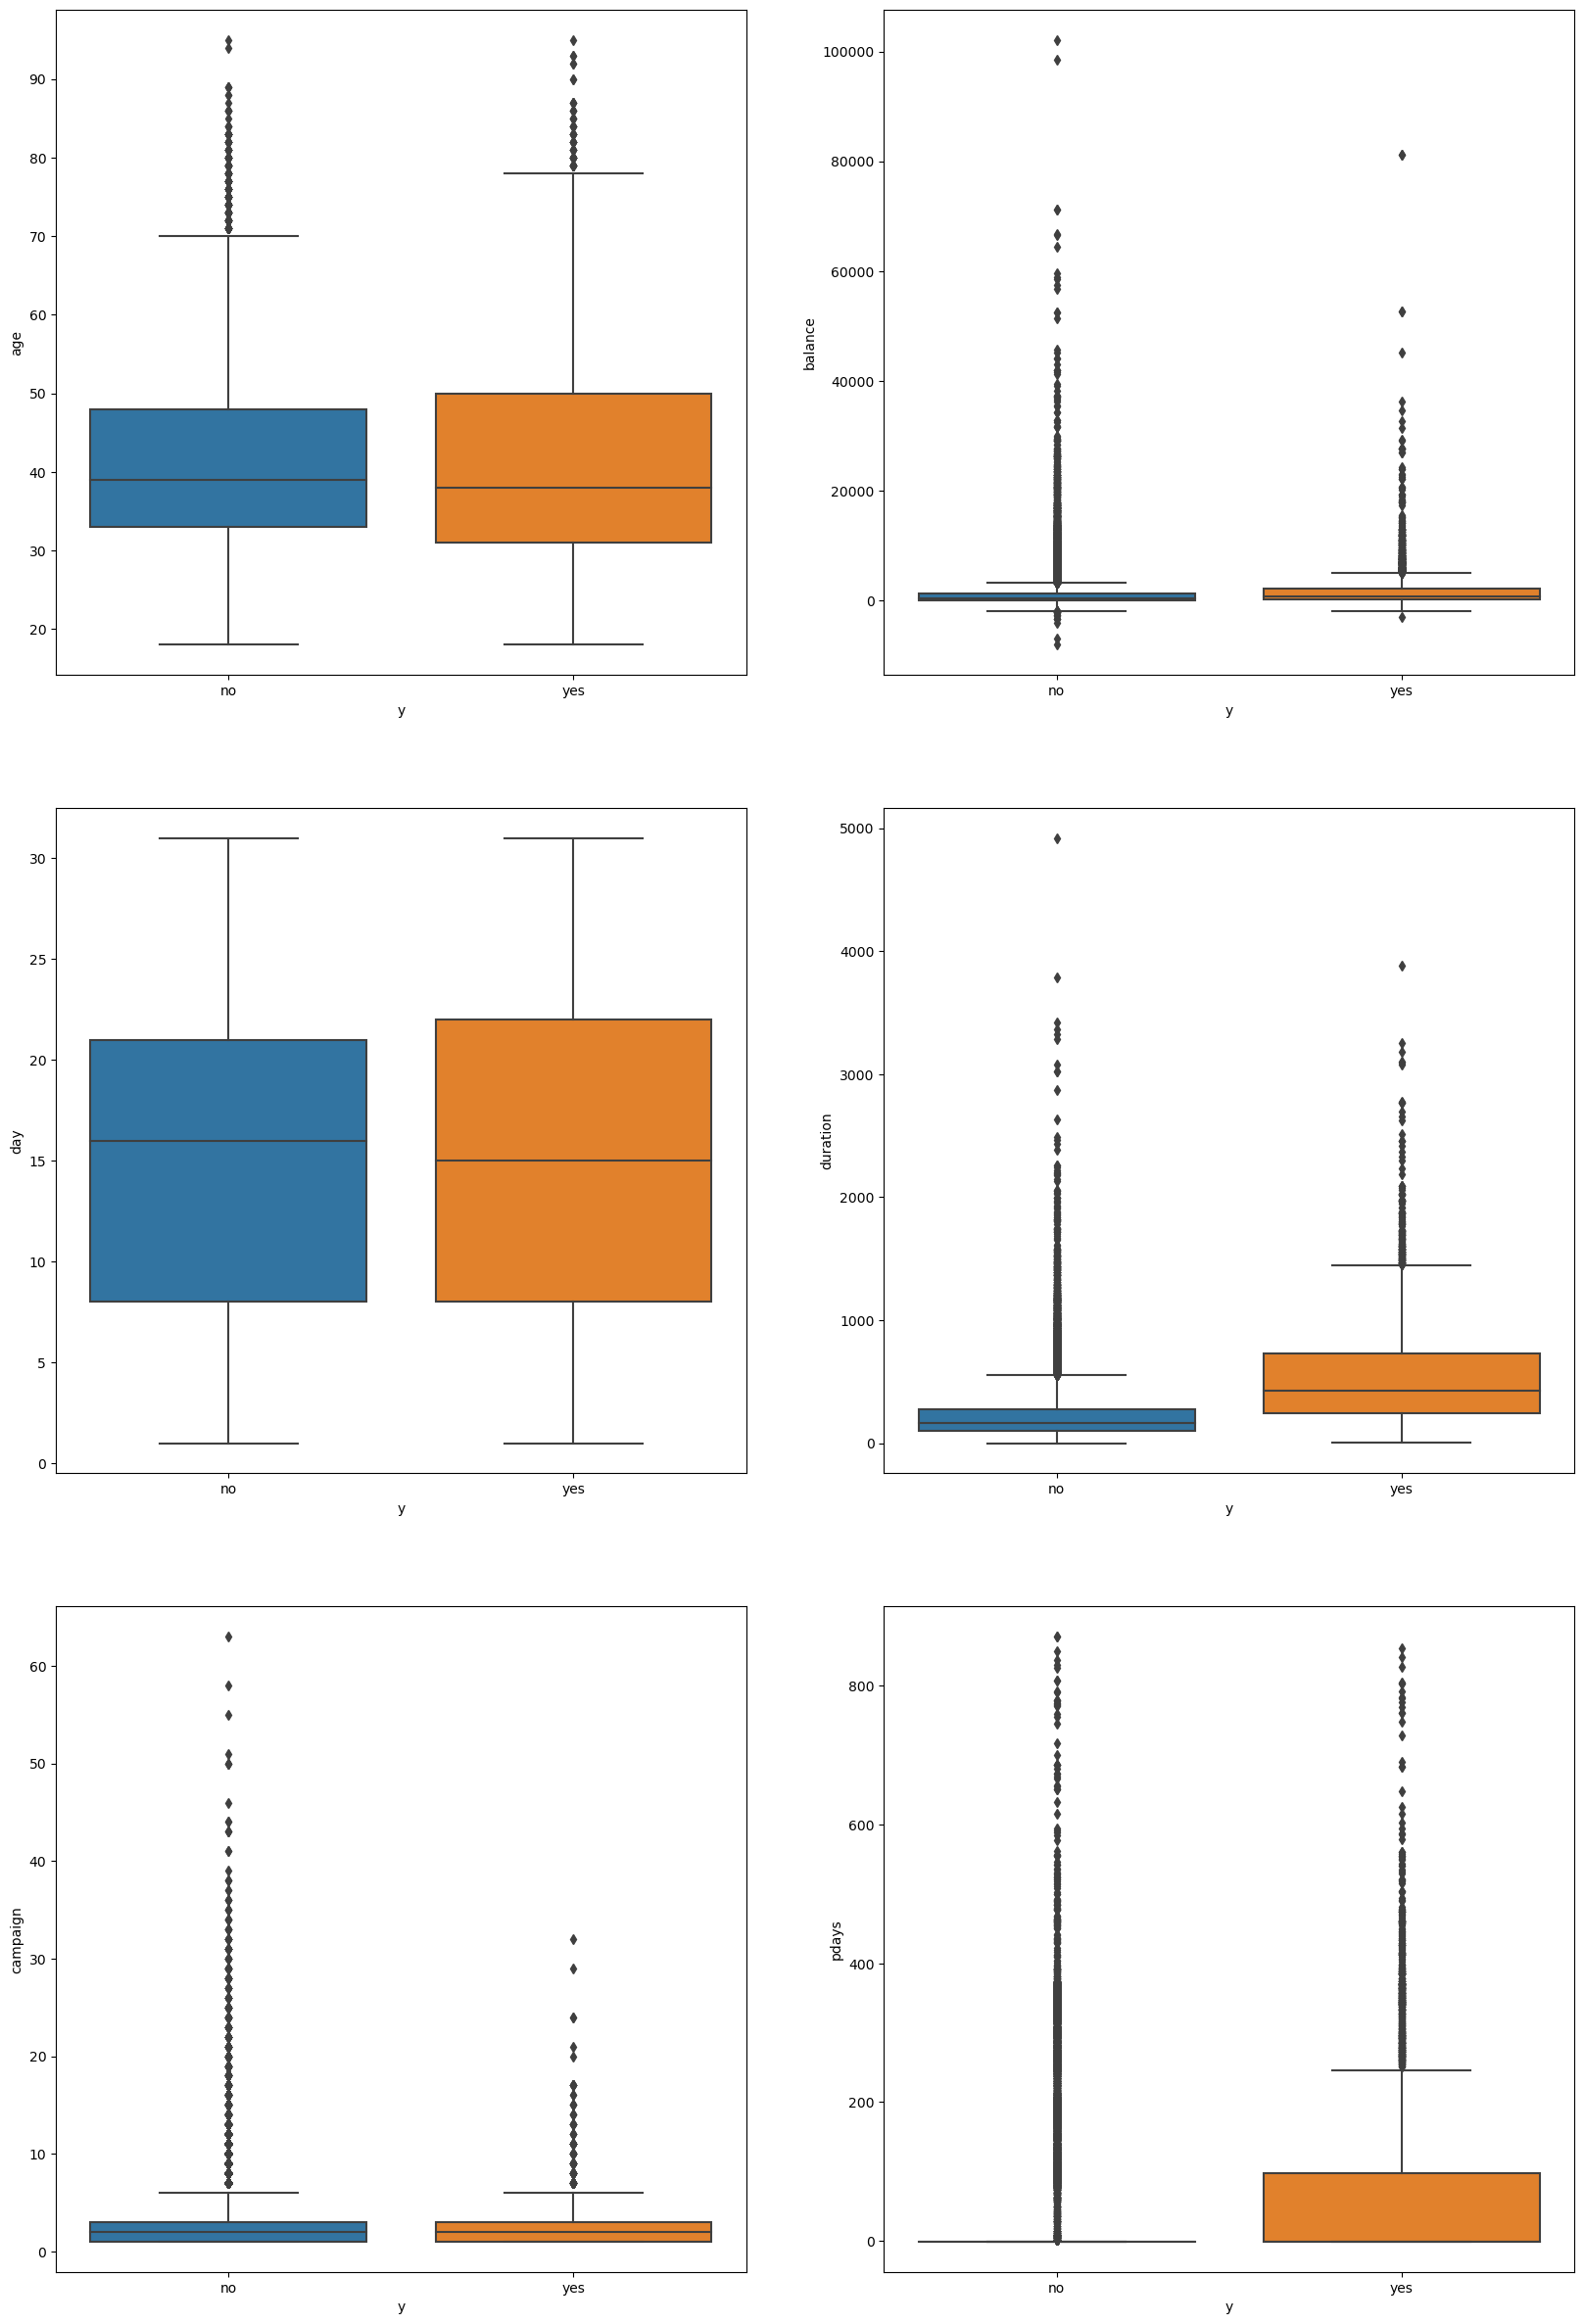

In [66]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(20,30))

sns.boxplot(x='y', y='age', data=df, ax=ax1)
sns.boxplot(x='y', y='balance', data=df, ax=ax2)
sns.boxplot(x='y', y='day', data=df, ax=ax3)
sns.boxplot(x='y', y='duration', data=df, ax=ax4)
sns.boxplot(x='y', y='campaign', data=df, ax=ax5)
sns.boxplot(x='y', y='pdays', data=df, ax=ax6)

Summary:


In [67]:
df1 = df.copy()
df1['y'] = df1['y'].replace({"yes": 1 , "no": 0})
numeric_data = df1.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.096564,-0.009880,-0.004399,0.003877,-0.022419,0.000928,0.026939
balance,0.096564,1.000000,0.003348,0.018195,-0.014147,0.003968,0.017243,0.049705
day,-0.009880,0.003348,1.000000,-0.029674,0.162336,-0.093166,-0.052083,-0.026821
duration,-0.004399,0.018195,-0.029674,1.000000,-0.083061,-0.000478,0.002330,0.395099
campaign,0.003877,-0.014147,0.162336,-0.083061,1.000000,-0.089042,-0.035162,-0.072085
pdays,-0.022419,0.003968,-0.093166,-0.000478,-0.089042,1.000000,0.461822,0.103665
previous,0.000928,0.017243,-0.052083,0.002330,-0.035162,0.461822,1.000000,0.094567
y,0.026939,0.049705,-0.026821,0.395099,-0.072085,0.103665,0.094567,1.000000


In [89]:
from scipy.stats import chi2_contingency

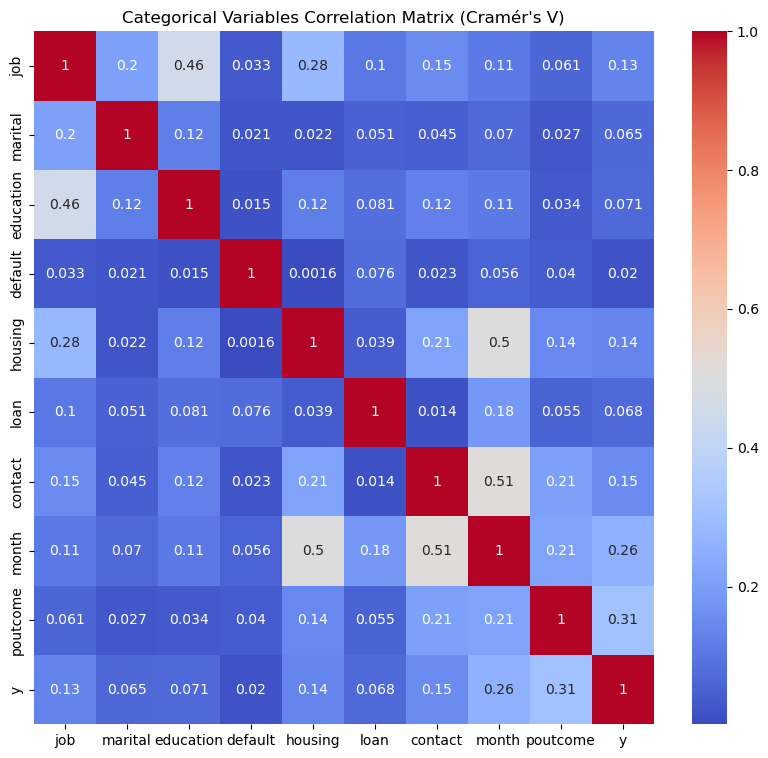

In [92]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V for the given confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Get total number of observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the categorical variables that you want to analyze
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

# Clean data to remove missing values
clean_df = df.dropna(subset=categorical_cols)

# Clean data to remove missing values
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the data type to floating-point
corr_matrix = corr_matrix.astype(float)

# Visual correlation matrix
plt.figure(figsize=(10, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Categorical Variables Correlation Matrix (Cramér\'s V)')
plt.show()

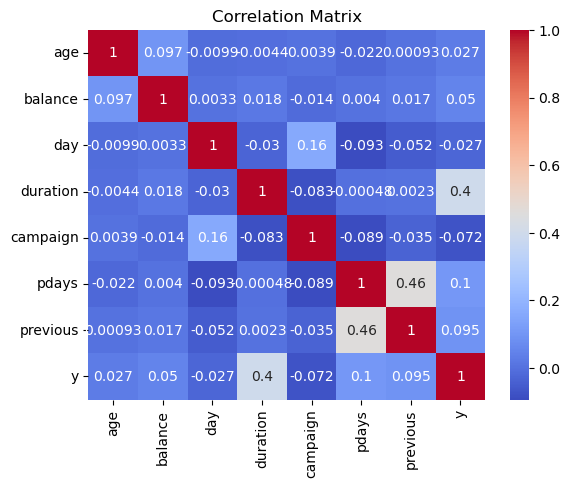

In [68]:
# Create the heatmap for num data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#cat - job,housing,contact,poutcome,
# 
# num - balance,duration,campaign,pdays,previous

In [69]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [70]:
df2 = df1.drop(columns=['job','education'])

Build pipline

In [71]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

In [72]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [96]:
df1['y'].value_counts()/len(df1)

y
0    0.883174
1    0.116826
Name: count, dtype: float64

In [105]:
#X = df1.drop(columns=['y'])
#y = df1['y']

# reserve 20% for testing
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [118]:
train['y'] = train['y'].replace({"yes": 1 , "no": 0})
test['y'] = test['y'].replace({"yes": 1 , "no": 0})

X_train = train[['balance', 'duration', 'campaign', 'pdays', 'previous','job','housing','contact','poutcome']]
X_test = test[['balance', 'duration', 'campaign', 'pdays', 'previous','job','housing','contact','poutcome']]
y_train = train['y']
y_test = test['y']

In [119]:

numeric_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']
#cat - job,housing,contact,poutcome,
categorical_columns =['job','housing','contact','poutcome']

In [120]:
# create a pre-processing pipeline which includes the steps of Scaling numeric variables and encoding categoricals

preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [137]:
pip install imblearn

In [136]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [121]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(class_weight='balanced')

In [122]:
#build pipline
pipeline_knn = Pipeline(steps=
                   [
                       ('preprocessor',preprocessor),
                       ('classifier',knn)
                   ])

In [123]:
#build pipline
pipeline_log = Pipeline(steps=
                   [
                       ('preprocessor',preprocessor),
                       ('classifier',logreg)
                   ])

In [126]:
knn_scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='accuracy', cv=5)
logreg_scores = cross_val_score(pipeline_log, X_train, y_train, scoring='accuracy', cv=5)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [127]:
print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')

Logistic Regression Mean F1 Score: 0.8895178857787351
K-Nearest Neighbors Mean F1 Score: 0.8632183847318189


In [192]:
new_df = df1.copy()

In [ ]:
# Encode categorical features using OneHotEncoder
# convert categorical data into one-hot encoded representation
for i in categorial_to_onehot:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(new_df[[i]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))
    
    new_df = pd.concat([new_df, onehot_encoded_df], axis=1)

new_df.head()

In [ ]:
# Encode categorical features using LabelEncoder
# convert categorical data into numerical labels
encoder = LabelEncoder()
for categorial_label in categorial_to_labelencoder:
    new_df[categorial_label] = encoder.fit_transform(new_df[categorial_label])

new_df.head()